In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
labels = ['age', 'operation_year', 'axil_nodes', 'survived_status']

haberman = pd.read_csv("haberman.csv", names=labels)
haberman['survived_status'] = haberman['survived_status'].map({1:'survived', 2:'dead'})


In [22]:
print (haberman.shape)
haberman.head()
#Total 306 featues or rows
# total 4 labels or columns
#objective to identify patients are survived or died

(306, 4)


,age,operation_year,axil_nodes,survived_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


In [15]:
print (haberman.columns)


Index(['age', 'operation_year', 'axil_nodes', 'survived_status'], dtype='object')


In [21]:
haberman["survived_status"].value_counts()

survived    225
dead         81
Name: survived_status, dtype: int64

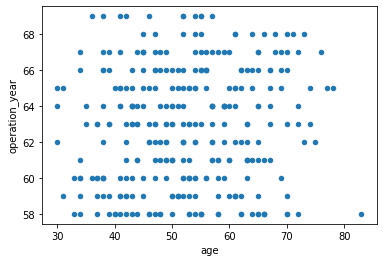

In [23]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='operation_year') ;
plt.show()

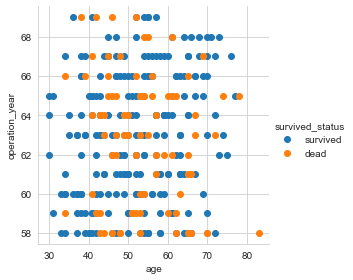

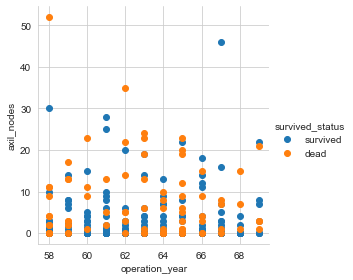

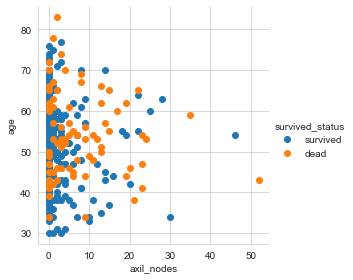

In [31]:
#scatter-plot
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survived_status", height=4) \
   .map(plt.scatter, "age", "operation_year") \
   .add_legend();
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survived_status", height=4) \
   .map(plt.scatter, "operation_year", "axil_nodes") \
   .add_legend();
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survived_status", height=4) \
   .map(plt.scatter, "axil_nodes", "age") \
   .add_legend();
plt.show();

# majority of operations are performed on people age range between 40 and 68, where most of the points plotted.
# quite good concentration of data point When axil_node is 0
# large number of operation were done in span of 7 years between 1960 and 1966.




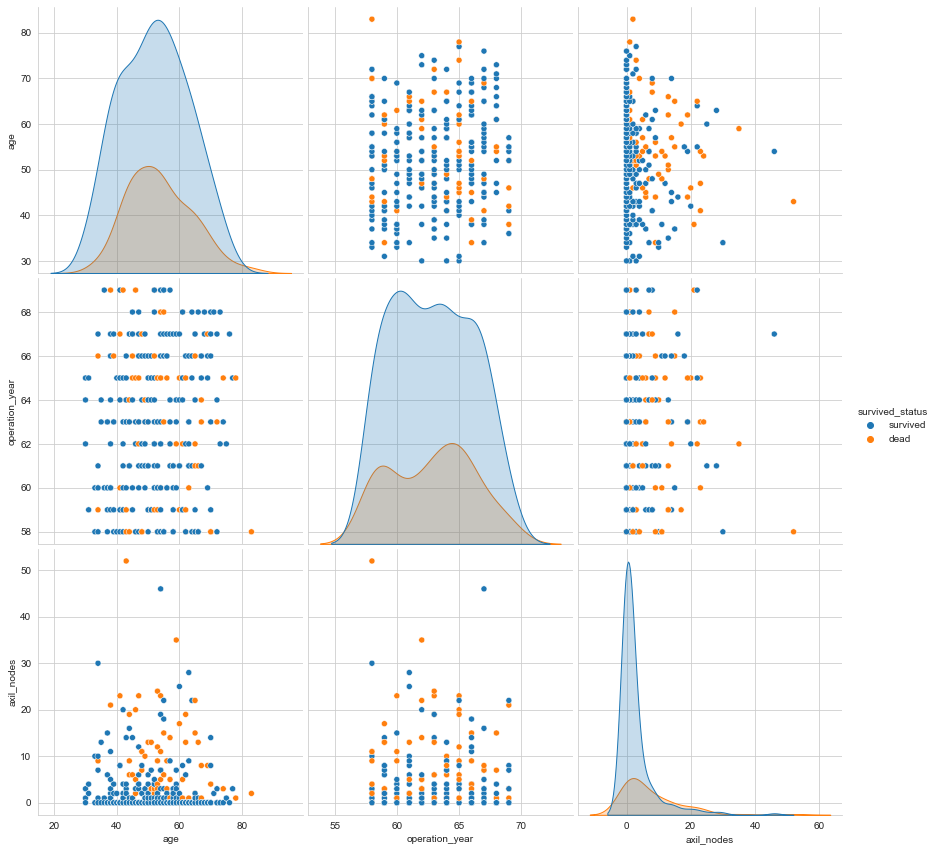

In [36]:
#Pair-plot
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue = 'survived_status', height = 4)
plt.show()

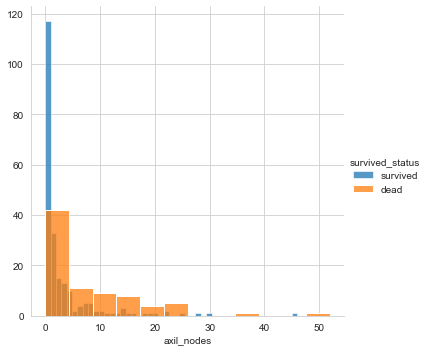

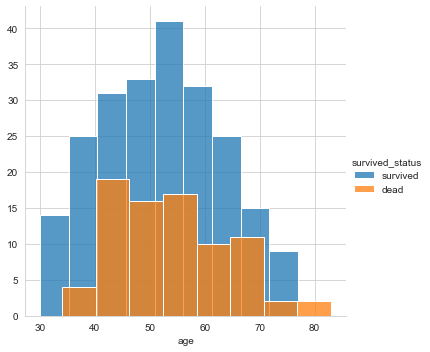

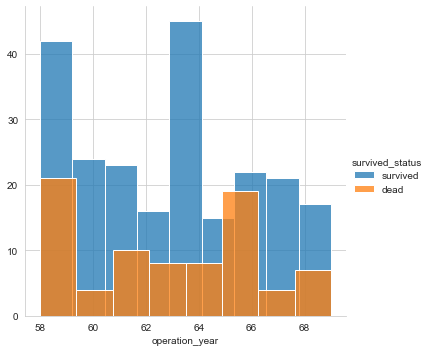

In [41]:
#histogram
sns.FacetGrid(haberman, hue="survived_status", height=5) \
   .map(sns.histplot, "axil_nodes") \
   .add_legend();
plt.show();

#the axil_nodes 0 have more survived patients

#histogram
sns.FacetGrid(haberman, hue="survived_status", height=5) \
   .map(sns.histplot, "age") \
   .add_legend();
plt.show();

#histogram
sns.FacetGrid(haberman, hue="survived_status", height=5) \
   .map(sns.histplot, "operation_year") \
   .add_legend();
plt.show();

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


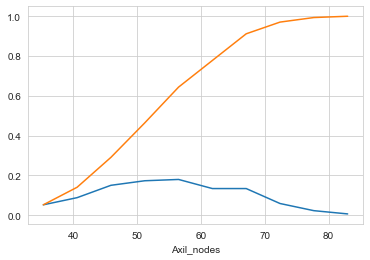

In [46]:
#CDF
counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.xlabel('Axil_nodes')

plt.show();

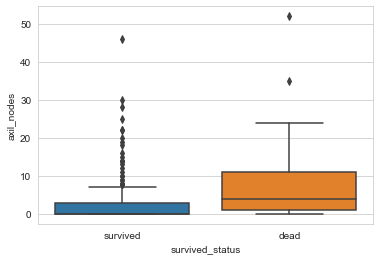

In [47]:
#Boxplot
sns.boxplot(x='survived_status', y = 'axil_nodes', data=haberman)
plt.show()

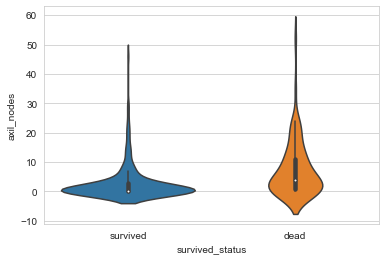

In [48]:
#violin plot
sns.violinplot(x='survived_status', y='axil_nodes', data = haberman, size = 9)
plt.show()

In [ ]:
#Axil_nodes is most important feature in this dataset, as who had Axil node >= 1 those are more likely to die.

#Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to survive inspite of having axil node >= 1